In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#a-c
data = pd.read_csv('Eng_salaries.csv')
print("Shape:", data.shape)
print(data.head(10))

Shape: (78, 6)
             Rank Discipline  YearsSinceDegree  YearsOfService Gender  Salary
0         Manager          B                56              49   Male  186960
1         Manager          A                12               6   Male   93000
2         Manager          A                23              20   Male  110515
3         Manager          A                40              31   Male  131205
4         Manager          B                20              18   Male  104800
5         Manager          A                20              20   Male  122400
6  SeniorEngineer          A                20              17   Male   81285
7         Manager          A                18              18   Male  126300
8         Manager          A                29              19   Male   94350
9         Manager          A                51              51   Male   57800


In [2]:
#d-f
data = data.drop(columns='Discipline')
data = data.dropna()
data.describe()

,YearsSinceDegree,YearsOfService,Salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [3]:
#calculate the mean and std dev of salary for each rank
grouped = data['Salary'].groupby(data['Rank'])
print("Mean:\n",grouped.mean())
print("\nStandard Deviation:\n", grouped.std())

Mean:
 Rank
JuniorEngineer     81362.789474
Manager           123624.804348
SeniorEngineer     91786.230769
Name: Salary, dtype: float64

Standard Deviation:
 Rank
JuniorEngineer     9381.245301
Manager           24850.287853
SeniorEngineer    18571.183714
Name: Salary, dtype: float64


In [4]:
#calculate min, mean, and max of Salary, YearsOfService together (not separatly)
data[['Salary','YearsOfService']].agg(['min','mean','max'])

,Salary,YearsOfService
min,57800.000000,0.000000
mean,108023.782051,15.051282
max,186960.000000,51.000000


In [5]:
#Print 10th to 25th indexed rows for the columns Rank, YearsSincePhd, and Salary.
data.loc[10:25, ['Rank','YearsSinceDegree','Salary']]

,Rank,YearsSinceDegree,Salary
10,Manager,39,128250
11,Manager,23,134778
12,JuniorEngineer,1,88000
13,Manager,35,162200
14,Manager,25,153750
15,Manager,17,150480
16,JuniorEngineer,8,75044
17,JuniorEngineer,4,92000
18,Manager,19,107300
19,Manager,29,150500


In [6]:
data.sort_values(by=['Salary','YearsOfService'], ascending=[False,False])

,Rank,YearsSinceDegree,YearsOfService,Gender,Salary
0,Manager,56,49,Male,186960
13,Manager,35,33,Male,162200
72,Manager,24,15,Female,161101
27,Manager,45,43,Male,155865
31,Manager,22,21,Male,155750
...,...,...,...,...,...
55,JuniorEngineer,2,0,Female,72500
71,SeniorEngineer,12,9,Female,71065
66,JuniorEngineer,7,6,Female,63100
54,SeniorEngineer,25,22,Female,62884


Text(0.5, 1.0, 'Male vs Female Salary')

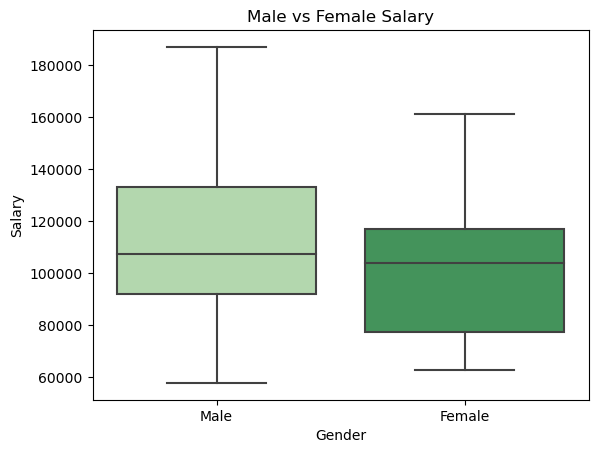

In [7]:
sns.boxplot(x=data['Gender'], y=data['Salary'], palette='Greens')
plt.title('Male vs Female Salary')


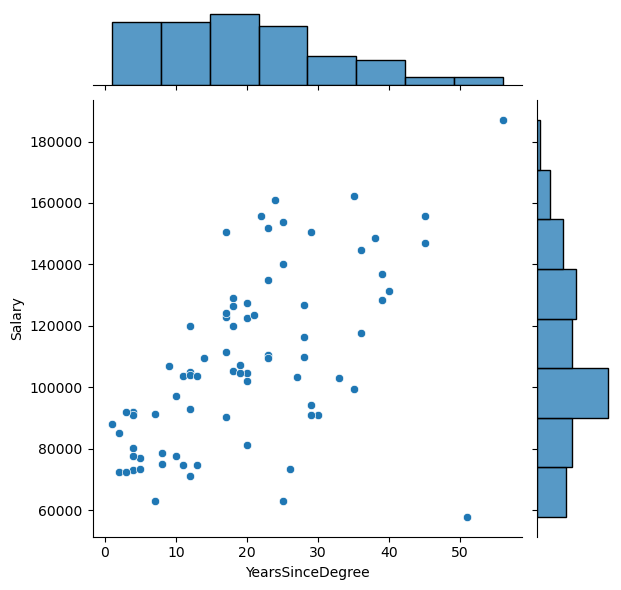

In [8]:
sns.jointplot(data, x='YearsSinceDegree',y='Salary')
#It seems to be a positive relationship. 
#As YearsSinceDegree increases, so does the Salary

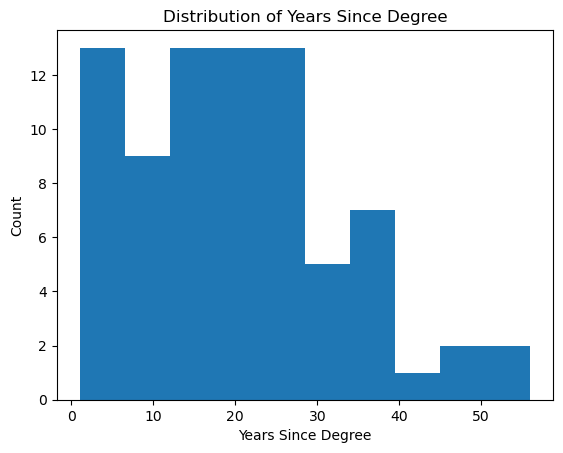

In [9]:
import numpy as np
from scipy.stats import norm
import statistics

#YearsSinceDegree is not normally distributed. 
#If it was, the histogram would be bell-shaped, but it is not.

# Plot the histogram.
plt.hist(data['YearsSinceDegree'])
plt.xlabel('Years Since Degree')
plt.ylabel('Count')
plt.title('Distribution of Years Since Degree')
plt.show()
